In [1]:
#Cargamos librerías
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
import warnings

# Desactivar todos los warnings temporalmente
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
# Configura pandas para que muestre todos los nombres de columna completos
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
# Configurar pandas y NumPy para mostrar los números en notación decimal
# pd.set_option('display.float_format', '{:.3f}'.format)
# np.set_printoptions(suppress=True)

In [3]:
# Cambiar al directorio deseado
directorio = r"G:/Unidades compartidas/Rocío doctorado/Proyecto NLP/Datos/Comunidades"
os.chdir(directorio)

# Confirmar el cambio
print(f"Nuevo directorio: {os.getcwd()}")



Nuevo directorio: G:\Unidades compartidas\Rocío doctorado\Proyecto NLP\Datos\Comunidades


In [4]:
# Crear un diccionario para almacenar las tablas
tablas = {}

# Leer archivos que empiezan con una mayúscula
for archivo in os.listdir(directorio):
    if archivo[0].isupper() and archivo.endswith('.csv'):  # Filtra archivos que empiezan con mayúscula y terminan en .csv
        nombre_tabla = os.path.splitext(archivo)[0]  # Extrae el nombre del archivo sin la extensión
        ruta_archivo = os.path.join(directorio, archivo)  # Obtiene la ruta completa del archivo
        
        # Cargar el archivo como un DataFrame
        tablas[nombre_tabla] = pd.read_csv(ruta_archivo)

# Confirmar la lectura de archivos
print(f"Se cargaron {len(tablas)} tablas:")
for nombre, df in tablas.items():
    print(f"- {nombre}: {df.shape}")

Se cargaron 16 tablas:
- RL_best_parametros_unigramas: (2, 6)
- RF_best_parametros_unigramas: (2, 6)
- DT_best_parametros_unigramas_chi: (2, 6)
- AB_best_parametros_unigramas_chi: (2, 6)
- RF_best_parametros_caracteristicas_contextuales: (2, 6)
- AB_best_parametros_caracteristicas_contextuales: (2, 6)
- RL_best_parametros_caracteristicas_contextuales: (2, 6)
- DT_best_parametros_caracteristicas_contextuales: (2, 6)
- RL_best_parametros_analisis_sentimiento: (2, 6)
- DT_best_parametros_analisis_sentimiento: (2, 6)
- RF_best_parametros_analisis_sentimiento: (2, 6)
- AB_best_parametros_analisis_sentimientos: (2, 6)
- AB_best_todas_variables_comunidades: (2, 6)
- DT_best_parametros_todas_variables_comunidades: (2, 6)
- RL_best_parametros_todas_variables_comunidades: (2, 6)
- RF_best_parametros_todas_variables_comunidades: (2, 6)


In [5]:
# quiero elegir la mejor combinacion de cada modelo y las guardo en una tabla para luego hacer el grafico de barra
modelos=["car_cont", "car_cont","sent", "sent", "unigr", "unigr","all_var" , "all_var" ]

print(modelos)
resultados_RF=pd.concat([tablas['RF_best_parametros_caracteristicas_contextuales'],tablas['RF_best_parametros_analisis_sentimiento'], tablas['RF_best_parametros_unigramas'], tablas['RF_best_parametros_todas_variables_comunidades']], axis=0)
#resultados_yuyitos['Modelos']=modelos

resultados_RF['Models']=modelos
resultados_RF

['car_cont', 'car_cont', 'sent', 'sent', 'unigr', 'unigr', 'all_var', 'all_var']


,Unnamed: 0,Accuracy,Sensitivity,Specificity,F1 Score,ROC AUC,Models
0,Entrenamiento,0.5910,0.9996,0.0011,0.7428,0.5814,car_cont
1,Prueba,0.5884,0.9994,0.0004,0.7408,0.5814,car_cont
0,Entrenamiento,0.8097,0.9370,0.6258,0.8533,0.8742,sent
1,Prueba,0.8037,0.9340,0.6173,0.8485,0.8603,sent
0,Entrenamiento,0.9792,0.9848,0.9712,0.9825,0.9957,unigr
1,Prueba,0.8396,0.8940,0.7618,0.8677,0.8902,unigr
0,Entrenamiento,0.9996,0.9999,0.9991,0.9996,0.9999,all_var
1,Prueba,0.8463,0.9096,0.7557,0.8744,0.8971,all_var


In [6]:
# quiero elegir la mejor combinacion de cada modelo y las guardo en una tabla para luego hacer el grafico de barra
modelos=["car_cont", "car_cont","sent", "sent", "unigr", "unigr","all_var" , "all_var" ]

print(modelos)
resultados_RL=pd.concat([tablas['RL_best_parametros_caracteristicas_contextuales'],tablas['RL_best_parametros_analisis_sentimiento'], tablas['RL_best_parametros_unigramas'], tablas['RL_best_parametros_todas_variables_comunidades']], axis=0)
#resultados_yuyitos['Modelos']=modelos

resultados_RL['Models']=modelos
resultados_RL

['car_cont', 'car_cont', 'sent', 'sent', 'unigr', 'unigr', 'all_var', 'all_var']


,Unnamed: 0,Accuracy,Sensitivity,Specificity,F1 Score,ROC AUC,Models
0,Entrenamiento,0.6052,0.9062,0.1707,0.7306,0.5827,car_cont
1,Prueba,0.6017,0.9040,0.1692,0.7276,0.5824,car_cont
0,Entrenamiento,0.5855,0.9388,0.0753,0.7280,0.5717,sent
1,Prueba,0.5828,0.9397,0.0722,0.7261,0.5723,sent
0,Entrenamiento,0.8446,0.9017,0.7622,0.8727,0.8966,unigr
1,Prueba,0.8399,0.8991,0.7553,0.8686,0.8910,unigr
0,Entrenamiento,0.8468,0.9051,0.7625,0.8747,0.8977,all_var
1,Prueba,0.8424,0.9029,0.7559,0.8709,0.8920,all_var


In [7]:
# quiero elegir la mejor combinacion de cada modelo y las guardo en una tabla para luego hacer el grafico de barra
modelos=["car_cont", "car_cont","sent", "sent", "unigr", "unigr","all_var" , "all_var" ]

print(modelos)
resultados_DT=pd.concat([tablas['DT_best_parametros_caracteristicas_contextuales'],tablas['DT_best_parametros_analisis_sentimiento'], tablas['DT_best_parametros_unigramas_chi'], tablas['DT_best_parametros_todas_variables_comunidades']], axis=0)
#resultados_yuyitos['Modelos']=modelos

resultados_DT['Models']=modelos
resultados_DT

['car_cont', 'car_cont', 'sent', 'sent', 'unigr', 'unigr', 'all_var', 'all_var']


,Unnamed: 0,Accuracy,Sensitivity,Specificity,F1 Score,ROC AUC,Models
0,Entrenamiento,0.6194,0.8800,0.2432,0.7320,0.6191,car_cont
1,Prueba,0.6028,0.8664,0.2256,0.7197,0.5882,car_cont
0,Entrenamiento,0.8213,0.9115,0.6910,0.8577,0.8755,sent
1,Prueba,0.8124,0.9053,0.6796,0.8503,0.8628,sent
0,Entrenamiento,0.8170,0.9534,0.6202,0.8603,0.8768,unigr
1,Prueba,0.7978,0.9410,0.5931,0.8457,0.8555,unigr
0,Entrenamiento,0.8413,0.8996,0.7571,0.8701,0.8971,all_var
1,Prueba,0.8115,0.8763,0.7188,0.8455,0.8537,all_var


In [8]:
# quiero elegir la mejor combinacion de cada modelo y las guardo en una tabla para luego hacer el grafico de barra
modelos=["car_cont", "car_cont","sent", "sent", "unigr", "unigr","all_var" , "all_var" ]

print(modelos)
resultados_AB=pd.concat([tablas['AB_best_parametros_caracteristicas_contextuales'],tablas['AB_best_parametros_analisis_sentimientos'], tablas['AB_best_parametros_unigramas_chi'], tablas['AB_best_todas_variables_comunidades']], axis=0)
#resultados_yuyitos['Modelos']=modelos

resultados_AB['Models']=modelos
resultados_AB

['car_cont', 'car_cont', 'sent', 'sent', 'unigr', 'unigr', 'all_var', 'all_var']


,Unnamed: 0,Accuracy,Sensitivity,Specificity,F1 Score,ROC AUC,Models
0,Entrenamiento,0.5930,0.9930,0.0155,0.7425,0.5729,car_cont
1,Prueba,0.5899,0.9916,0.0151,0.7400,0.5749,car_cont
0,Entrenamiento,0.8183,0.9290,0.6586,0.8580,0.8689,sent
1,Prueba,0.8170,0.9294,0.6561,0.8567,0.8709,sent
0,Entrenamiento,0.8264,0.9178,0.6944,0.8620,0.8871,unigr
1,Prueba,0.8251,0.9185,0.6915,0.8608,0.8848,unigr
0,Entrenamiento,0.8340,0.9051,0.7314,0.8656,0.8892,all_var
1,Prueba,0.8324,0.9074,0.7252,0.8644,0.8874,all_var


In [9]:
resultados_DT.columns

Index(['Unnamed: 0', 'Accuracy', 'Sensitivity', 'Specificity', 'F1 Score',
       'ROC AUC', 'Models'],
      dtype='object')

In [10]:
# Lista de columnas que deseas multiplicar por 100
columnas_a_multiplicar = ['Sensitivity','Specificity', 'Accuracy', 'F1 Score', 'ROC AUC']

# Multiplicar por 100 las columnas seleccionadas
resultados_RF[columnas_a_multiplicar] = resultados_RF[columnas_a_multiplicar].apply(lambda x: round(x * 100, 2))

# Multiplicar por 100 las columnas seleccionadas
resultados_RL[columnas_a_multiplicar] = resultados_RL[columnas_a_multiplicar].apply(lambda x: round(x * 100, 2))
# Multiplicar por 100 las columnas seleccionadas
resultados_AB[columnas_a_multiplicar] = resultados_AB[columnas_a_multiplicar].apply(lambda x: round(x * 100, 2))
# Multiplicar por 100 las columnas seleccionadas
resultados_DT[columnas_a_multiplicar] = resultados_DT[columnas_a_multiplicar].apply(lambda x: round(x * 100, 2))
# Mostrar el DataFrame actualizado

# Mostrar el DataFrame actualizado
resultados_RF





,Unnamed: 0,Accuracy,Sensitivity,Specificity,F1 Score,ROC AUC,Models
0,Entrenamiento,59.10,99.96,0.11,74.28,58.14,car_cont
1,Prueba,58.84,99.94,0.04,74.08,58.14,car_cont
0,Entrenamiento,80.97,93.70,62.58,85.33,87.42,sent
1,Prueba,80.37,93.40,61.73,84.85,86.03,sent
0,Entrenamiento,97.92,98.48,97.12,98.25,99.57,unigr
1,Prueba,83.96,89.40,76.18,86.77,89.02,unigr
0,Entrenamiento,99.96,99.99,99.91,99.96,99.99,all_var
1,Prueba,84.63,90.96,75.57,87.44,89.71,all_var


In [11]:
def guardar_grafico_metricas( metrica):
    # Crear un gráfico de ejemplo (sustituye esto con tu propio gráfico)
    

    # Generar el nombre del archivo usando el valor de sheet_name
    nombre_archivo = '{}.png'.format(metrica)

    # Combinar la ruta y el nombre del archivo
    ruta_completa = '{}\\{}'.format(ruta_graficos, nombre_archivo).replace('\\', '/')
    

    # Guardar el gráfico en la ubicación especificada
    plt.savefig(ruta_completa)
    plt.show()
    # Mostrar el gráfico (opcional)


In [12]:
resultados_RF = resultados_RF.rename(columns={
    'Specificity': 'Especificidad', 
    'F1 Score': 'Recall', 
    'Sensitivity': 'Sensibilidad',
    'Unnamed: 0': 'Conjunto'
})
resultados_RL = resultados_RL.rename(columns={
    'Specificity': 'Especificidad', 
    'F1 Score': 'Recall', 
    'Sensitivity': 'Sensibilidad',
    'Unnamed: 0': 'Conjunto'
})
resultados_DT = resultados_DT.rename(columns={
    'Specificity': 'Especificidad', 
    'F1 Score': 'Recall', 
    'Sensitivity': 'Sensibilidad',
    'Unnamed: 0': 'Conjunto'
})
resultados_AB = resultados_AB.rename(columns={
    'Specificity': 'Especificidad', 
    'F1 Score': 'Recall', 
    'Sensitivity': 'Sensibilidad',
    'Unnamed: 0': 'Conjunto'
})


In [13]:
ruta_graficos=('G:/Unidades compartidas/Rocío doctorado/Proyecto NLP/Graficos')

In [14]:
resultados_RF.columns

Index(['Conjunto', 'Accuracy', 'Sensibilidad', 'Especificidad', 'Recall',
       'ROC AUC', 'Models'],
      dtype='object')

In [15]:
print(resultados_RF)

        Conjunto  Accuracy  Sensibilidad  Especificidad  Recall  ROC AUC  \
0  Entrenamiento     59.10         99.96           0.11   74.28    58.14   
1         Prueba     58.84         99.94           0.04   74.08    58.14   
0  Entrenamiento     80.97         93.70          62.58   85.33    87.42   
1         Prueba     80.37         93.40          61.73   84.85    86.03   
0  Entrenamiento     97.92         98.48          97.12   98.25    99.57   
1         Prueba     83.96         89.40          76.18   86.77    89.02   
0  Entrenamiento     99.96         99.99          99.91   99.96    99.99   
1         Prueba     84.63         90.96          75.57   87.44    89.71   

     Models  
0  car_cont  
1  car_cont  
0      sent  
1      sent  
0     unigr  
1     unigr  
0   all_var  
1   all_var  


RANDOM FOREST

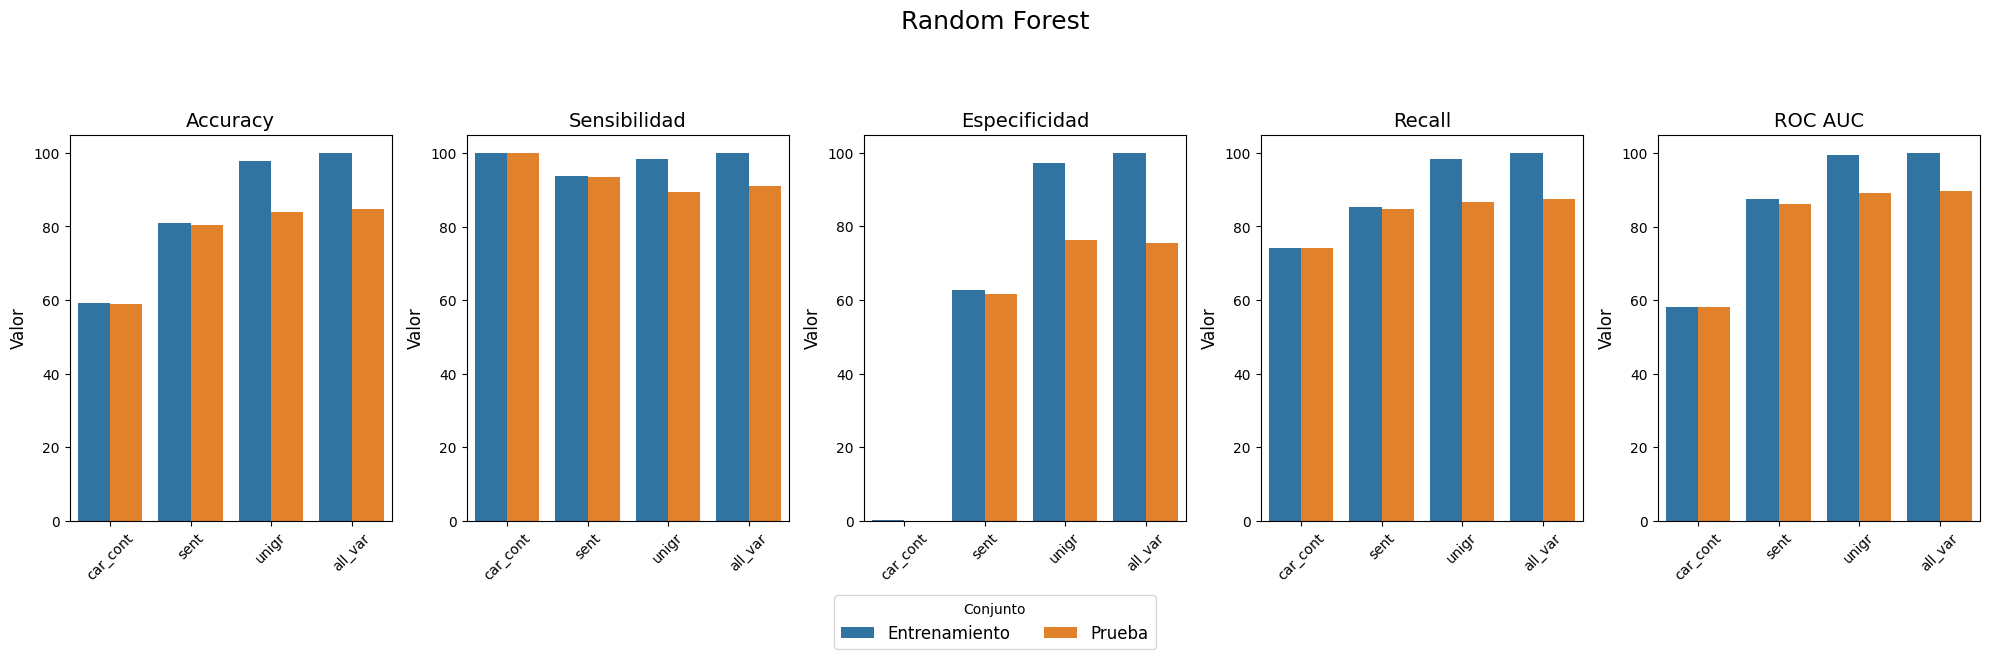

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir los datos a formato largo
resultados_long = pd.melt(resultados_RF, id_vars=['Models', 'Conjunto'], 
                          value_vars=['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC'],
                          var_name='Metric', value_name='Value')

# Crear el gráfico con subgráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 6))  # 1 fila y 5 columnas de subgráficos
fig.suptitle('Random Forest', fontsize=18)  # Título general

# Lista de métricas
metrics = ['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC']

# Inicializar manejadores y etiquetas para la leyenda común
handles, labels = None, None

# Crear los gráficos de barras para cada métrica
for i, metric in enumerate(metrics):
    ax = axes[i]
    barplot = sns.barplot(x='Models', y='Value', hue='Conjunto', 
                          data=resultados_long[resultados_long['Metric'] == metric], ax=ax)
    ax.set_title(metric, fontsize=14)  # Subtítulo con el nombre de la métrica
    ax.set_xlabel('')  # No mostrar etiquetas en el eje x para evitar solapamientos
    ax.set_ylabel('Valor', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
    
    # Obtener manejadores y etiquetas de la primera métrica
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()  # Eliminar leyendas individuales

# Añadir una leyenda común debajo de los gráficos
fig.legend(handles, labels, title='Conjunto', loc='lower center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, -0.10))

# Ajustar la disposición para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.90])  # Ajustar el layout para el título general y la leyenda
plt.show()


REGRESION LOGISTICA

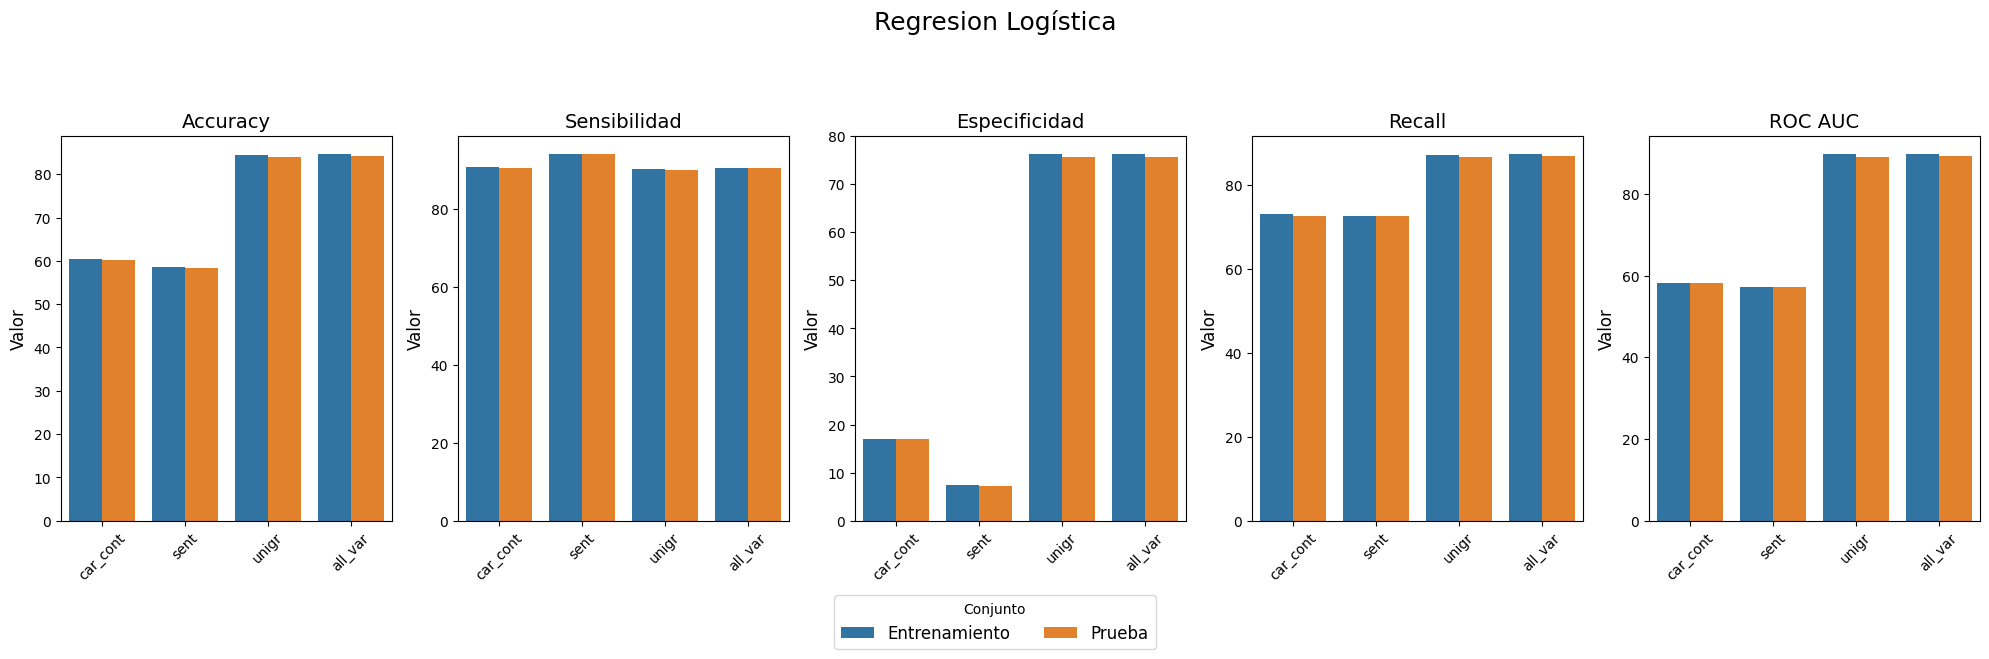

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir los datos a formato largo
resultados_long = pd.melt(resultados_RL, id_vars=['Models', 'Conjunto'], 
                          value_vars=['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC'],
                          var_name='Metric', value_name='Value')

# Crear el gráfico con subgráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 6))  # 1 fila y 5 columnas de subgráficos
fig.suptitle('Regresion Logística', fontsize=18)  # Título general

# Lista de métricas
metrics = ['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC']

# Inicializar manejadores y etiquetas para la leyenda común
handles, labels = None, None

# Crear los gráficos de barras para cada métrica
for i, metric in enumerate(metrics):
    ax = axes[i]
    barplot = sns.barplot(x='Models', y='Value', hue='Conjunto', 
                          data=resultados_long[resultados_long['Metric'] == metric], ax=ax)
    ax.set_title(metric, fontsize=14)  # Subtítulo con el nombre de la métrica
    ax.set_xlabel('')  # No mostrar etiquetas en el eje x para evitar solapamientos
    ax.set_ylabel('Valor', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
    
    # Obtener manejadores y etiquetas de la primera métrica
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()  # Eliminar leyendas individuales

# Añadir una leyenda común debajo de los gráficos
fig.legend(handles, labels, title='Conjunto', loc='lower center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, -0.10))

# Ajustar la disposición para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.90])  # Ajustar el layout para el título general y la leyenda
plt.show()


ADA BOOST

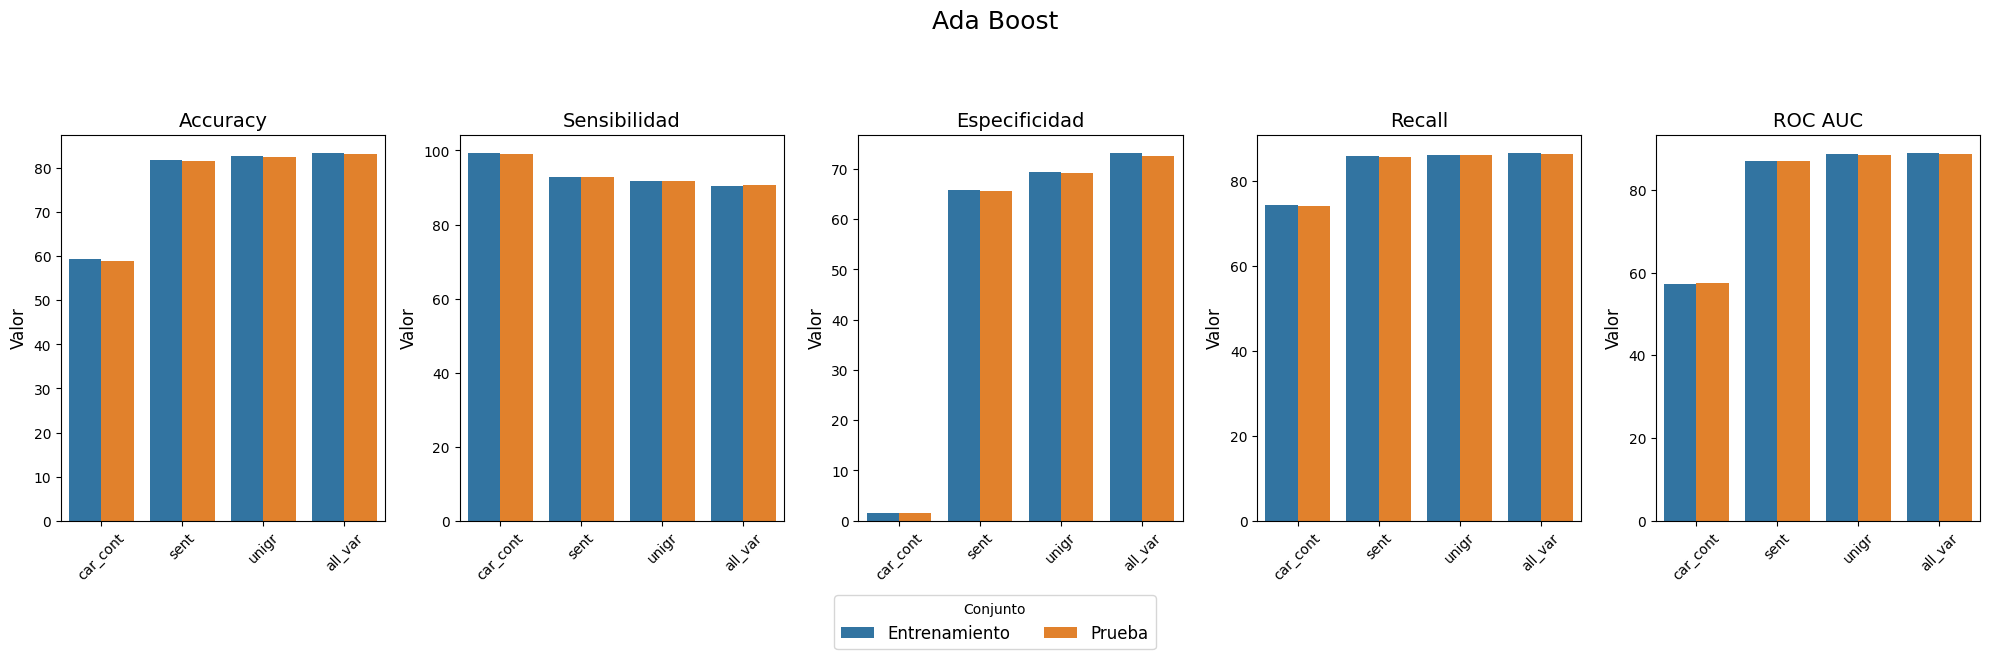

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir los datos a formato largo
resultados_long = pd.melt(resultados_AB, id_vars=['Models', 'Conjunto'], 
                          value_vars=['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC'],
                          var_name='Metric', value_name='Value')

# Crear el gráfico con subgráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 6))  # 1 fila y 5 columnas de subgráficos
fig.suptitle('Ada Boost', fontsize=18)  # Título general

# Lista de métricas
metrics = ['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC']

# Inicializar manejadores y etiquetas para la leyenda común
handles, labels = None, None

# Crear los gráficos de barras para cada métrica
for i, metric in enumerate(metrics):
    ax = axes[i]
    barplot = sns.barplot(x='Models', y='Value', hue='Conjunto', 
                          data=resultados_long[resultados_long['Metric'] == metric], ax=ax)
    ax.set_title(metric, fontsize=14)  # Subtítulo con el nombre de la métrica
    ax.set_xlabel('')  # No mostrar etiquetas en el eje x para evitar solapamientos
    ax.set_ylabel('Valor', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
    
    # Obtener manejadores y etiquetas de la primera métrica
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()  # Eliminar leyendas individuales

# Añadir una leyenda común debajo de los gráficos
fig.legend(handles, labels, title='Conjunto', loc='lower center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, -0.10))

# Ajustar la disposición para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.90])  # Ajustar el layout para el título general y la leyenda
plt.show()


DECISION TREE

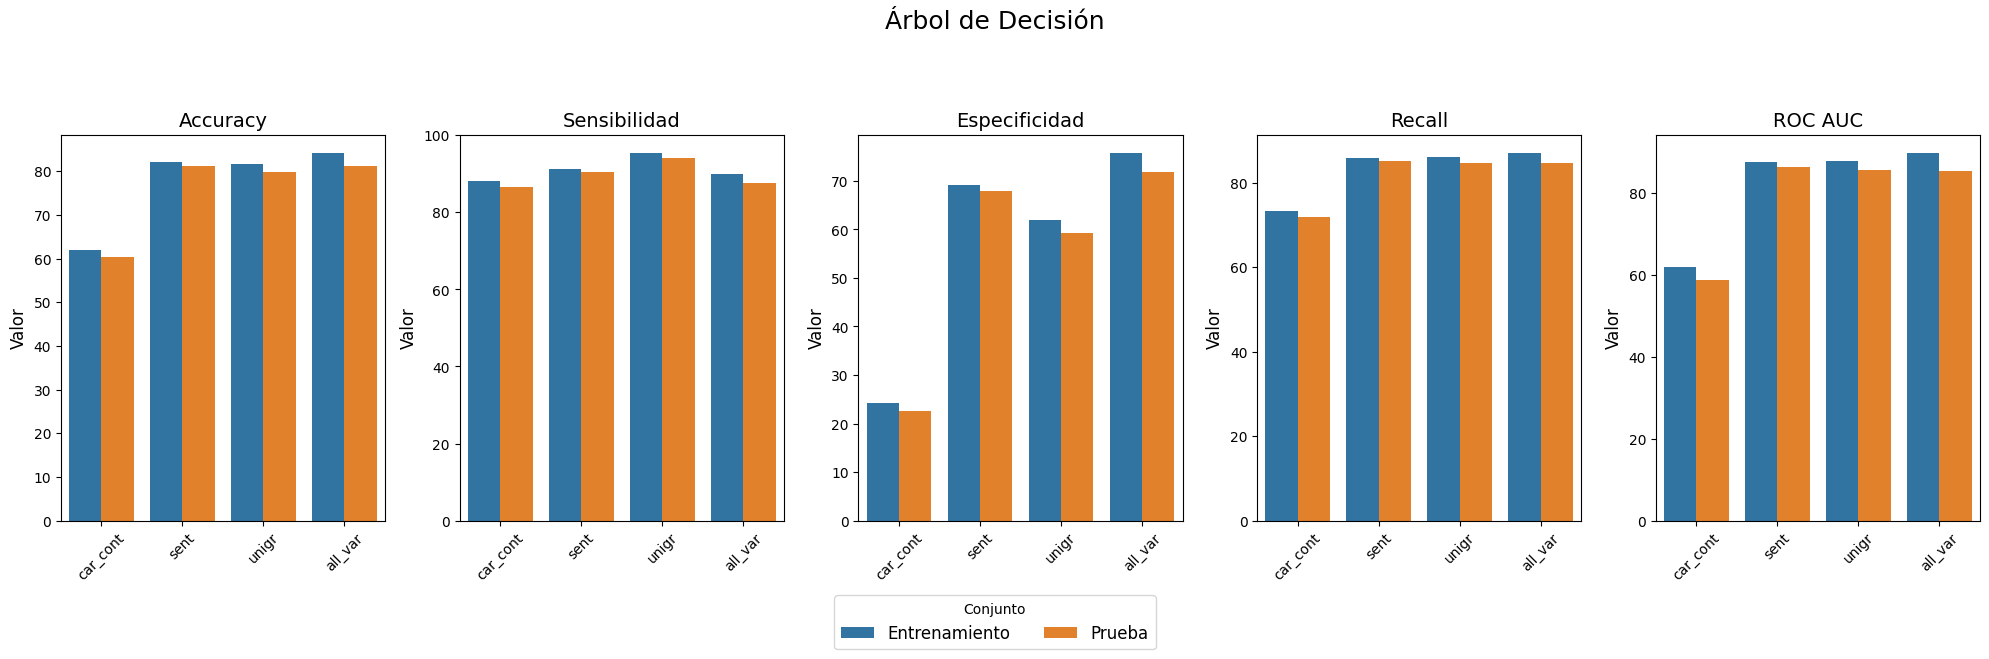

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir los datos a formato largo
resultados_long = pd.melt(resultados_DT, id_vars=['Models', 'Conjunto'], 
                          value_vars=['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC'],
                          var_name='Metric', value_name='Value')

# Crear el gráfico con subgráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 6))  # 1 fila y 5 columnas de subgráficos
fig.suptitle('Árbol de Decisión', fontsize=18)  # Título general

# Lista de métricas
metrics = ['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC']

# Inicializar manejadores y etiquetas para la leyenda común
handles, labels = None, None

# Crear los gráficos de barras para cada métrica
for i, metric in enumerate(metrics):
    ax = axes[i]
    barplot = sns.barplot(x='Models', y='Value', hue='Conjunto', 
                          data=resultados_long[resultados_long['Metric'] == metric], ax=ax)
    ax.set_title(metric, fontsize=14)  # Subtítulo con el nombre de la métrica
    ax.set_xlabel('')  # No mostrar etiquetas en el eje x para evitar solapamientos
    ax.set_ylabel('Valor', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
    
    # Obtener manejadores y etiquetas de la primera métrica
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()  # Eliminar leyendas individuales

# Añadir una leyenda común debajo de los gráficos
fig.legend(handles, labels, title='Conjunto', loc='lower center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, -0.10))

# Ajustar la disposición para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.90])  # Ajustar el layout para el título general y la leyenda
plt.show()


# COMPORAMOS LOS MODELOS CON TODAS LAS VARIABLES Y EL BASELINE 

In [20]:

bs=pd.read_csv("G:/Unidades compartidas/Rocío doctorado/Proyecto NLP/Datos/baseline_metrics.csv")
bs.columns=['Unnamed: 0', 'Accuracy', 'Sensitivity', 'Specificity', 'F1 Score',
       'ROC AUC']
bs

,Unnamed: 0,Accuracy,Sensitivity,Specificity,F1 Score,ROC AUC
0,Train,0.8650,0.8507,0.7718,0.8573,0.4715
1,Test,0.8507,0.8351,0.7487,0.8418,0.4760


In [21]:
# Reemplazar "train" por "entrenamiento" y "test" por "prueba" en la columna 'Unnamed: 0'
bs['Unnamed: 0'] = bs['Unnamed: 0'].replace({'Train': 'Entrenamiento', 'Test': 'Prueba'})


In [22]:
# quiero elegir la mejor combinacion de cada modelo y las guardo en una tabla para luego hacer el grafico de barra
modelos=["BS", "BS","RF", "RF", "RL", "RL","DT" , "DT", "AB", "AB" ]

print(modelos)
resultados=pd.concat([bs,tablas['RF_best_parametros_todas_variables_comunidades'], tablas['RL_best_parametros_todas_variables_comunidades'], tablas['DT_best_parametros_todas_variables_comunidades'], tablas['AB_best_todas_variables_comunidades']], axis=0)
#resultados_yuyitos['Modelos']=modelos

resultados['Models']=modelos
resultados


['BS', 'BS', 'RF', 'RF', 'RL', 'RL', 'DT', 'DT', 'AB', 'AB']


,Unnamed: 0,Accuracy,Sensitivity,Specificity,F1 Score,ROC AUC,Models
0,Entrenamiento,0.8650,0.8507,0.7718,0.8573,0.4715,BS
1,Prueba,0.8507,0.8351,0.7487,0.8418,0.4760,BS
0,Entrenamiento,0.9996,0.9999,0.9991,0.9996,0.9999,RF
1,Prueba,0.8463,0.9096,0.7557,0.8744,0.8971,RF
0,Entrenamiento,0.8468,0.9051,0.7625,0.8747,0.8977,RL
1,Prueba,0.8424,0.9029,0.7559,0.8709,0.8920,RL
0,Entrenamiento,0.8413,0.8996,0.7571,0.8701,0.8971,DT
1,Prueba,0.8115,0.8763,0.7188,0.8455,0.8537,DT
0,Entrenamiento,0.8340,0.9051,0.7314,0.8656,0.8892,AB
1,Prueba,0.8324,0.9074,0.7252,0.8644,0.8874,AB


In [23]:
# Lista de columnas que deseas multiplicar por 100
columnas_a_multiplicar = ['Sensitivity','Specificity', 'Accuracy', 'F1 Score', 'ROC AUC']

# Multiplicar por 100 las columnas seleccionadas
resultados[columnas_a_multiplicar] = resultados[columnas_a_multiplicar].apply(lambda x: round(x * 100, 2))



In [24]:
resultados.columns

Index(['Unnamed: 0', 'Accuracy', 'Sensitivity', 'Specificity', 'F1 Score',
       'ROC AUC', 'Models'],
      dtype='object')

In [25]:
resultados = resultados.rename(columns={
    'Specificity': 'Especificidad', 
    'F1 Score': 'Recall', 
    'ROC AUC': 'ROC AUC',
    'Sensitivity': 'Sensibilidad',
    'Unnamed: 0': 'Conjunto'
})



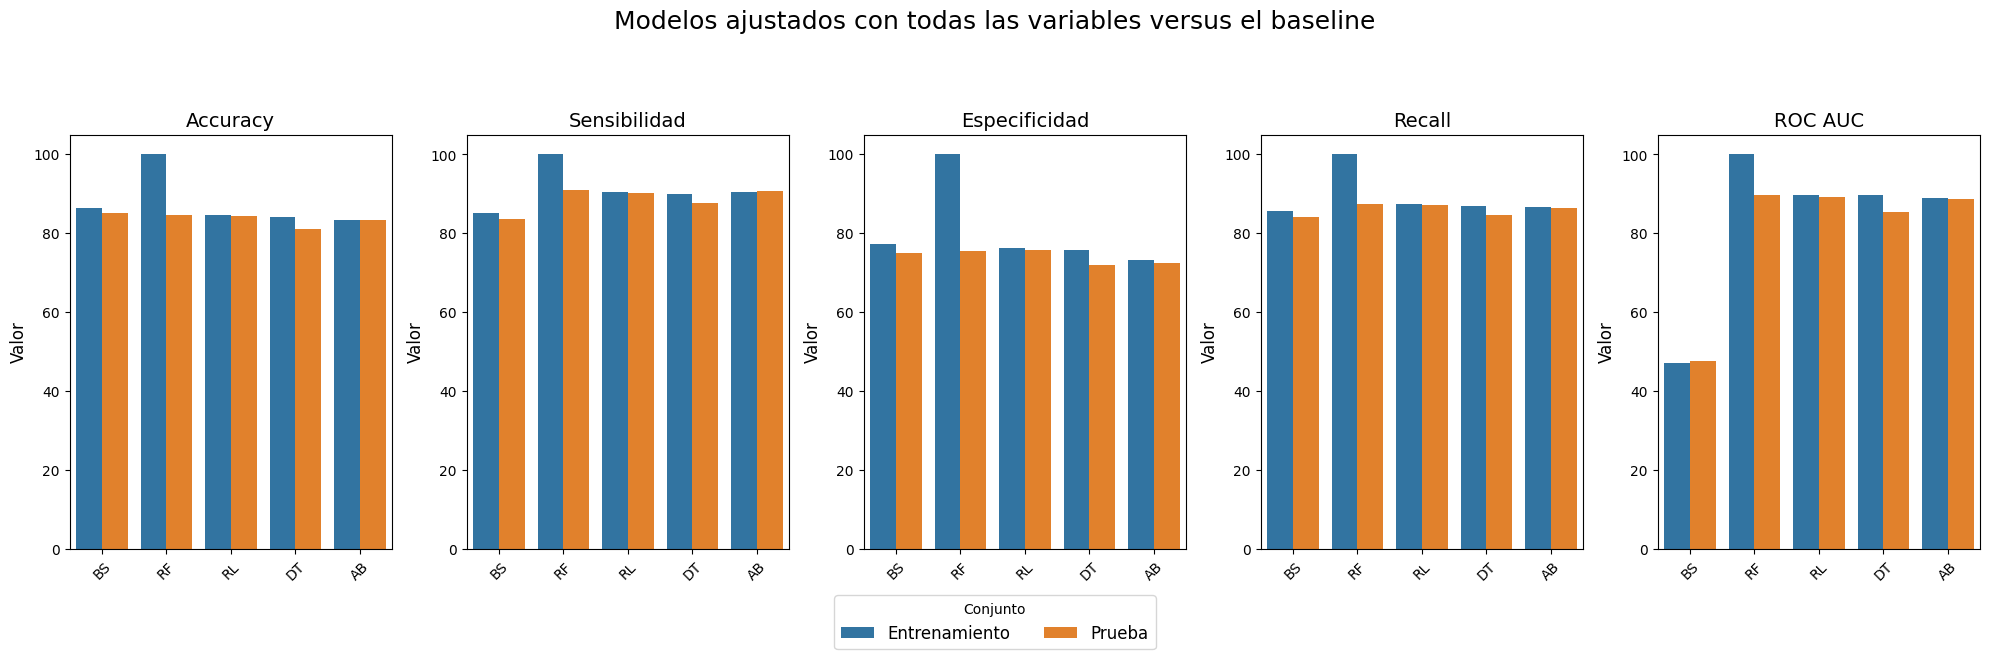

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'resultados_RF' es tu DataFrame
# Convertir los datos a formato largo
resultados_long = pd.melt(resultados, id_vars=['Models', 'Conjunto'], 
                          value_vars=['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC'],
                          var_name='Metric', value_name='Value')

# Crear el gráfico con subgráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 6))  # 1 fila y 5 columnas de subgráficos
fig.suptitle('Modelos ajustados con todas las variables versus el baseline', fontsize=18)  # Título general

# Lista de métricas
metrics = ['Accuracy', 'Sensibilidad', 'Especificidad', 'Recall', 'ROC AUC']

# Crear los gráficos de barras para cada métrica
handles, labels = None, None  # Inicializar manejadores y etiquetas para la leyenda
for i, metric in enumerate(metrics):
    ax = axes[i]
    barplot = sns.barplot(x='Models', y='Value', hue='Conjunto', 
                          data=resultados_long[resultados_long['Metric'] == metric], ax=ax)
    ax.set_title(metric, fontsize=14)  # Subtítulo con el nombre de la métrica
    ax.set_xlabel('')  # No mostrar etiquetas en el eje x para evitar solapamientos
    ax.set_ylabel('Valor', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()  # Obtener colores y etiquetas de la primera métrica
    ax.legend_.remove()  # Eliminar leyendas individuales de los subgráficos

# Añadir una leyenda común debajo de los gráficos con los colores de las barras
fig.legend(handles, labels, title='Conjunto', loc='lower center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, -0.10))

# Ajustar la disposición para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.90])  # Ajustar el layout para el título general y la leyenda
plt.show()
